In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import plotly.express as pltly
import seaborn as sns

In [3]:
df=pd.read_csv("/content/geo info of the countries-data.csv")

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

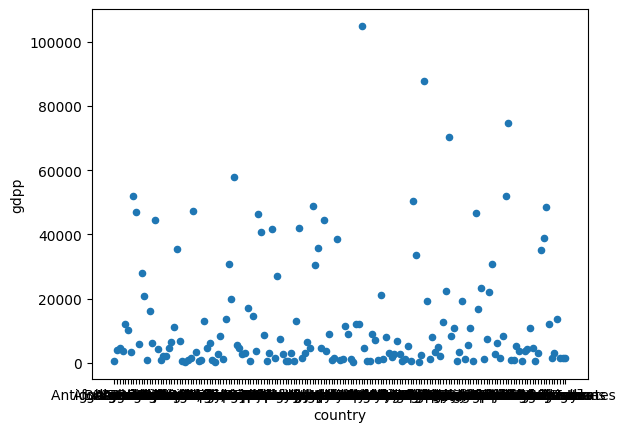

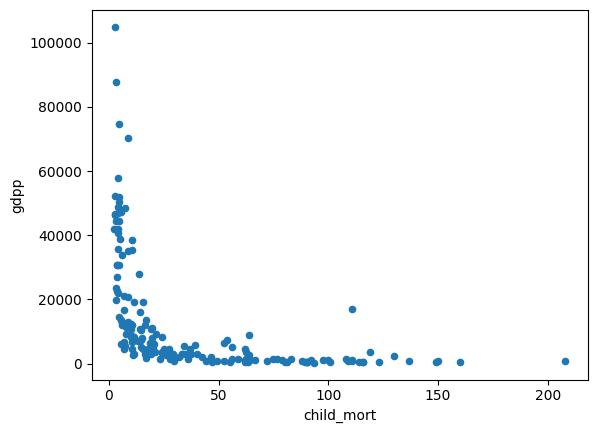

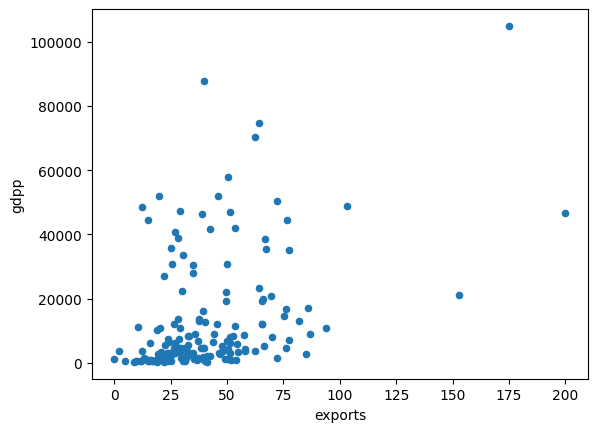

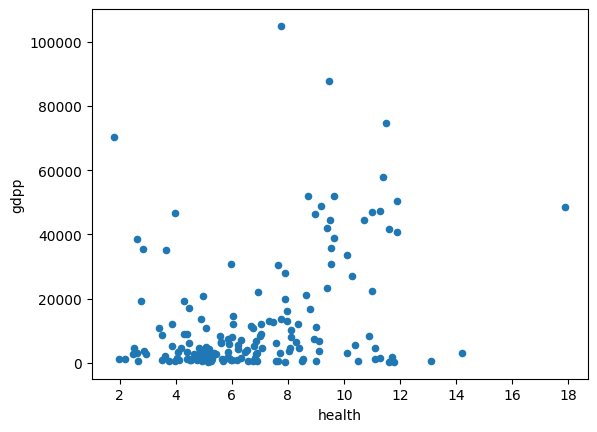

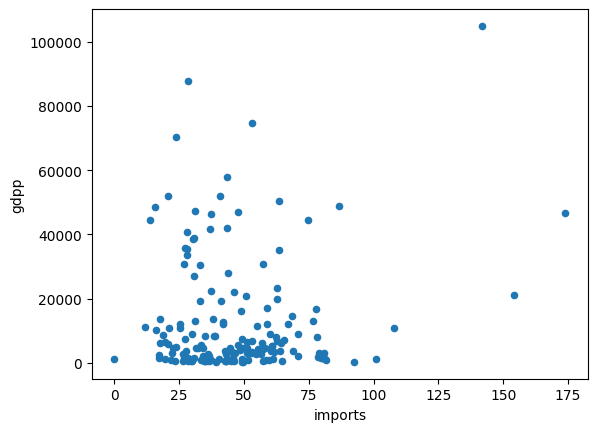

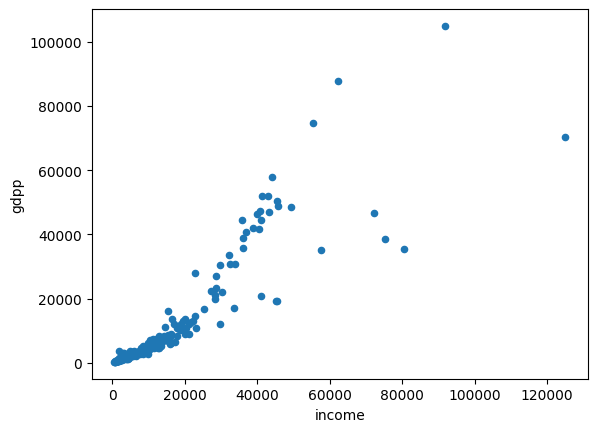

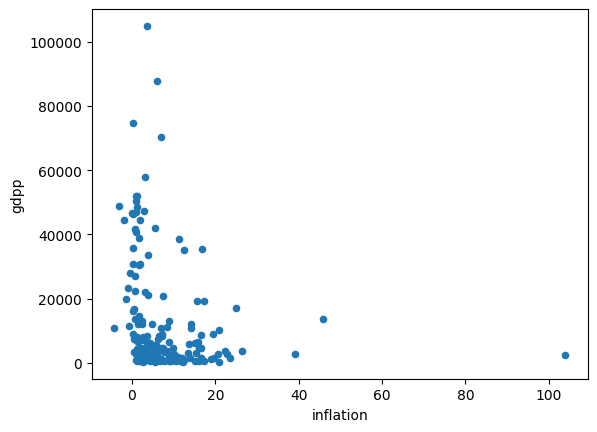

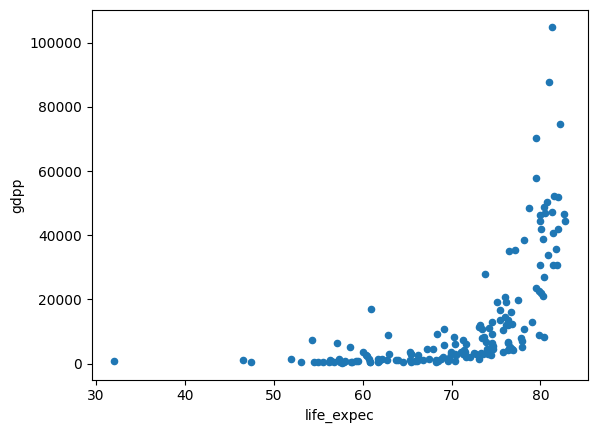

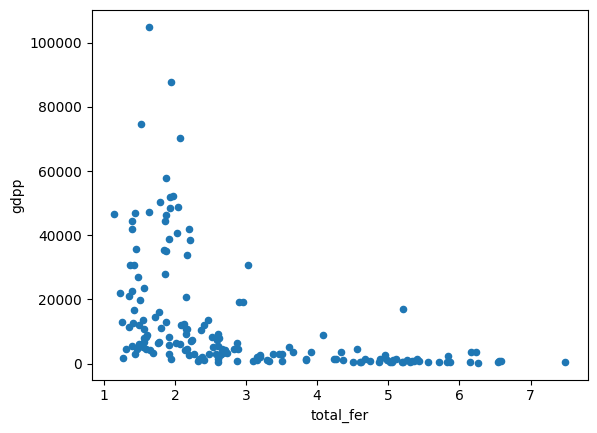

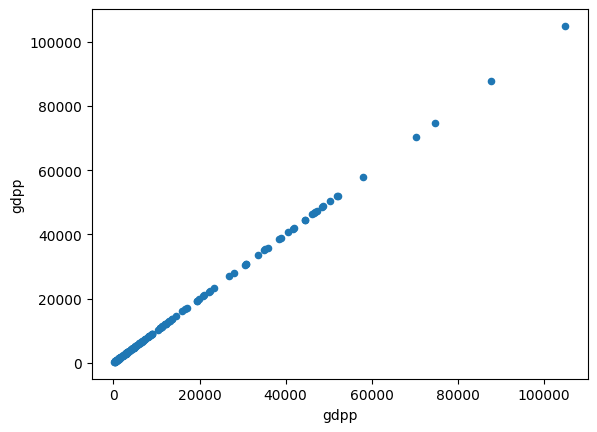

In [9]:
for col in df.columns:
  df.plot(kind='scatter',x=col,y='gdpp')
  plt.show()
  print(" ")

In [10]:
for i in df["inflation"]:
  count=int (0)
  if i < 0:
    print(i)
    count+=1
print("the number of negative values is",count)


-0.393
-1.43
-3.22
-1.9
-0.812
-4.21
-0.046
-0.987
the number of negative values is 0


In [11]:
df.isnull()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
162,False,False,False,False,False,False,False,False,False,False
163,False,False,False,False,False,False,False,False,False,False
164,False,False,False,False,False,False,False,False,False,False
165,False,False,False,False,False,False,False,False,False,False


In [12]:
# Selecting duplicate rows except last
# occurrence based on all columns.
duplicate = df[df.duplicated(keep = 'last')]

print("Duplicate Rows :")

# Print the resultant Dataframe
duplicate

Duplicate Rows :


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [13]:
duplicate.count()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [14]:
outliers=[]
def detect_outlier(data_1):

    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)


    for y in data_1:
        z_score= (y - mean_1)/std_1
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [15]:
for column in df:
  if(column!='country'):
    outlier_datapoint=detect_outlier(df[column])
    dfs=pd.DataFrame(outlier_datapoint)
    plot=pltly.box(dfs)
    plot.show()
    print(outlier_datapoint)

[208.0, 160.0]


[208.0, 160.0, 175.0, 153.0, 200.0]


[208.0, 160.0, 175.0, 153.0, 200.0, 17.9]


[208.0, 160.0, 175.0, 153.0, 200.0, 17.9, 142.0, 154.0, 174.0]


[208.0, 160.0, 175.0, 153.0, 200.0, 17.9, 142.0, 154.0, 174.0, 80600, 75200, 91700, 125000]


[208.0, 160.0, 175.0, 153.0, 200.0, 17.9, 142.0, 154.0, 174.0, 80600, 75200, 91700, 125000, 104.0, 45.9]


[208.0, 160.0, 175.0, 153.0, 200.0, 17.9, 142.0, 154.0, 174.0, 80600, 75200, 91700, 125000, 104.0, 45.9, 32.1]


[208.0, 160.0, 175.0, 153.0, 200.0, 17.9, 142.0, 154.0, 174.0, 80600, 75200, 91700, 125000, 104.0, 45.9, 32.1, 7.49]


[208.0, 160.0, 175.0, 153.0, 200.0, 17.9, 142.0, 154.0, 174.0, 80600, 75200, 91700, 125000, 104.0, 45.9, 32.1, 7.49, 105000, 87800, 70300, 74600]


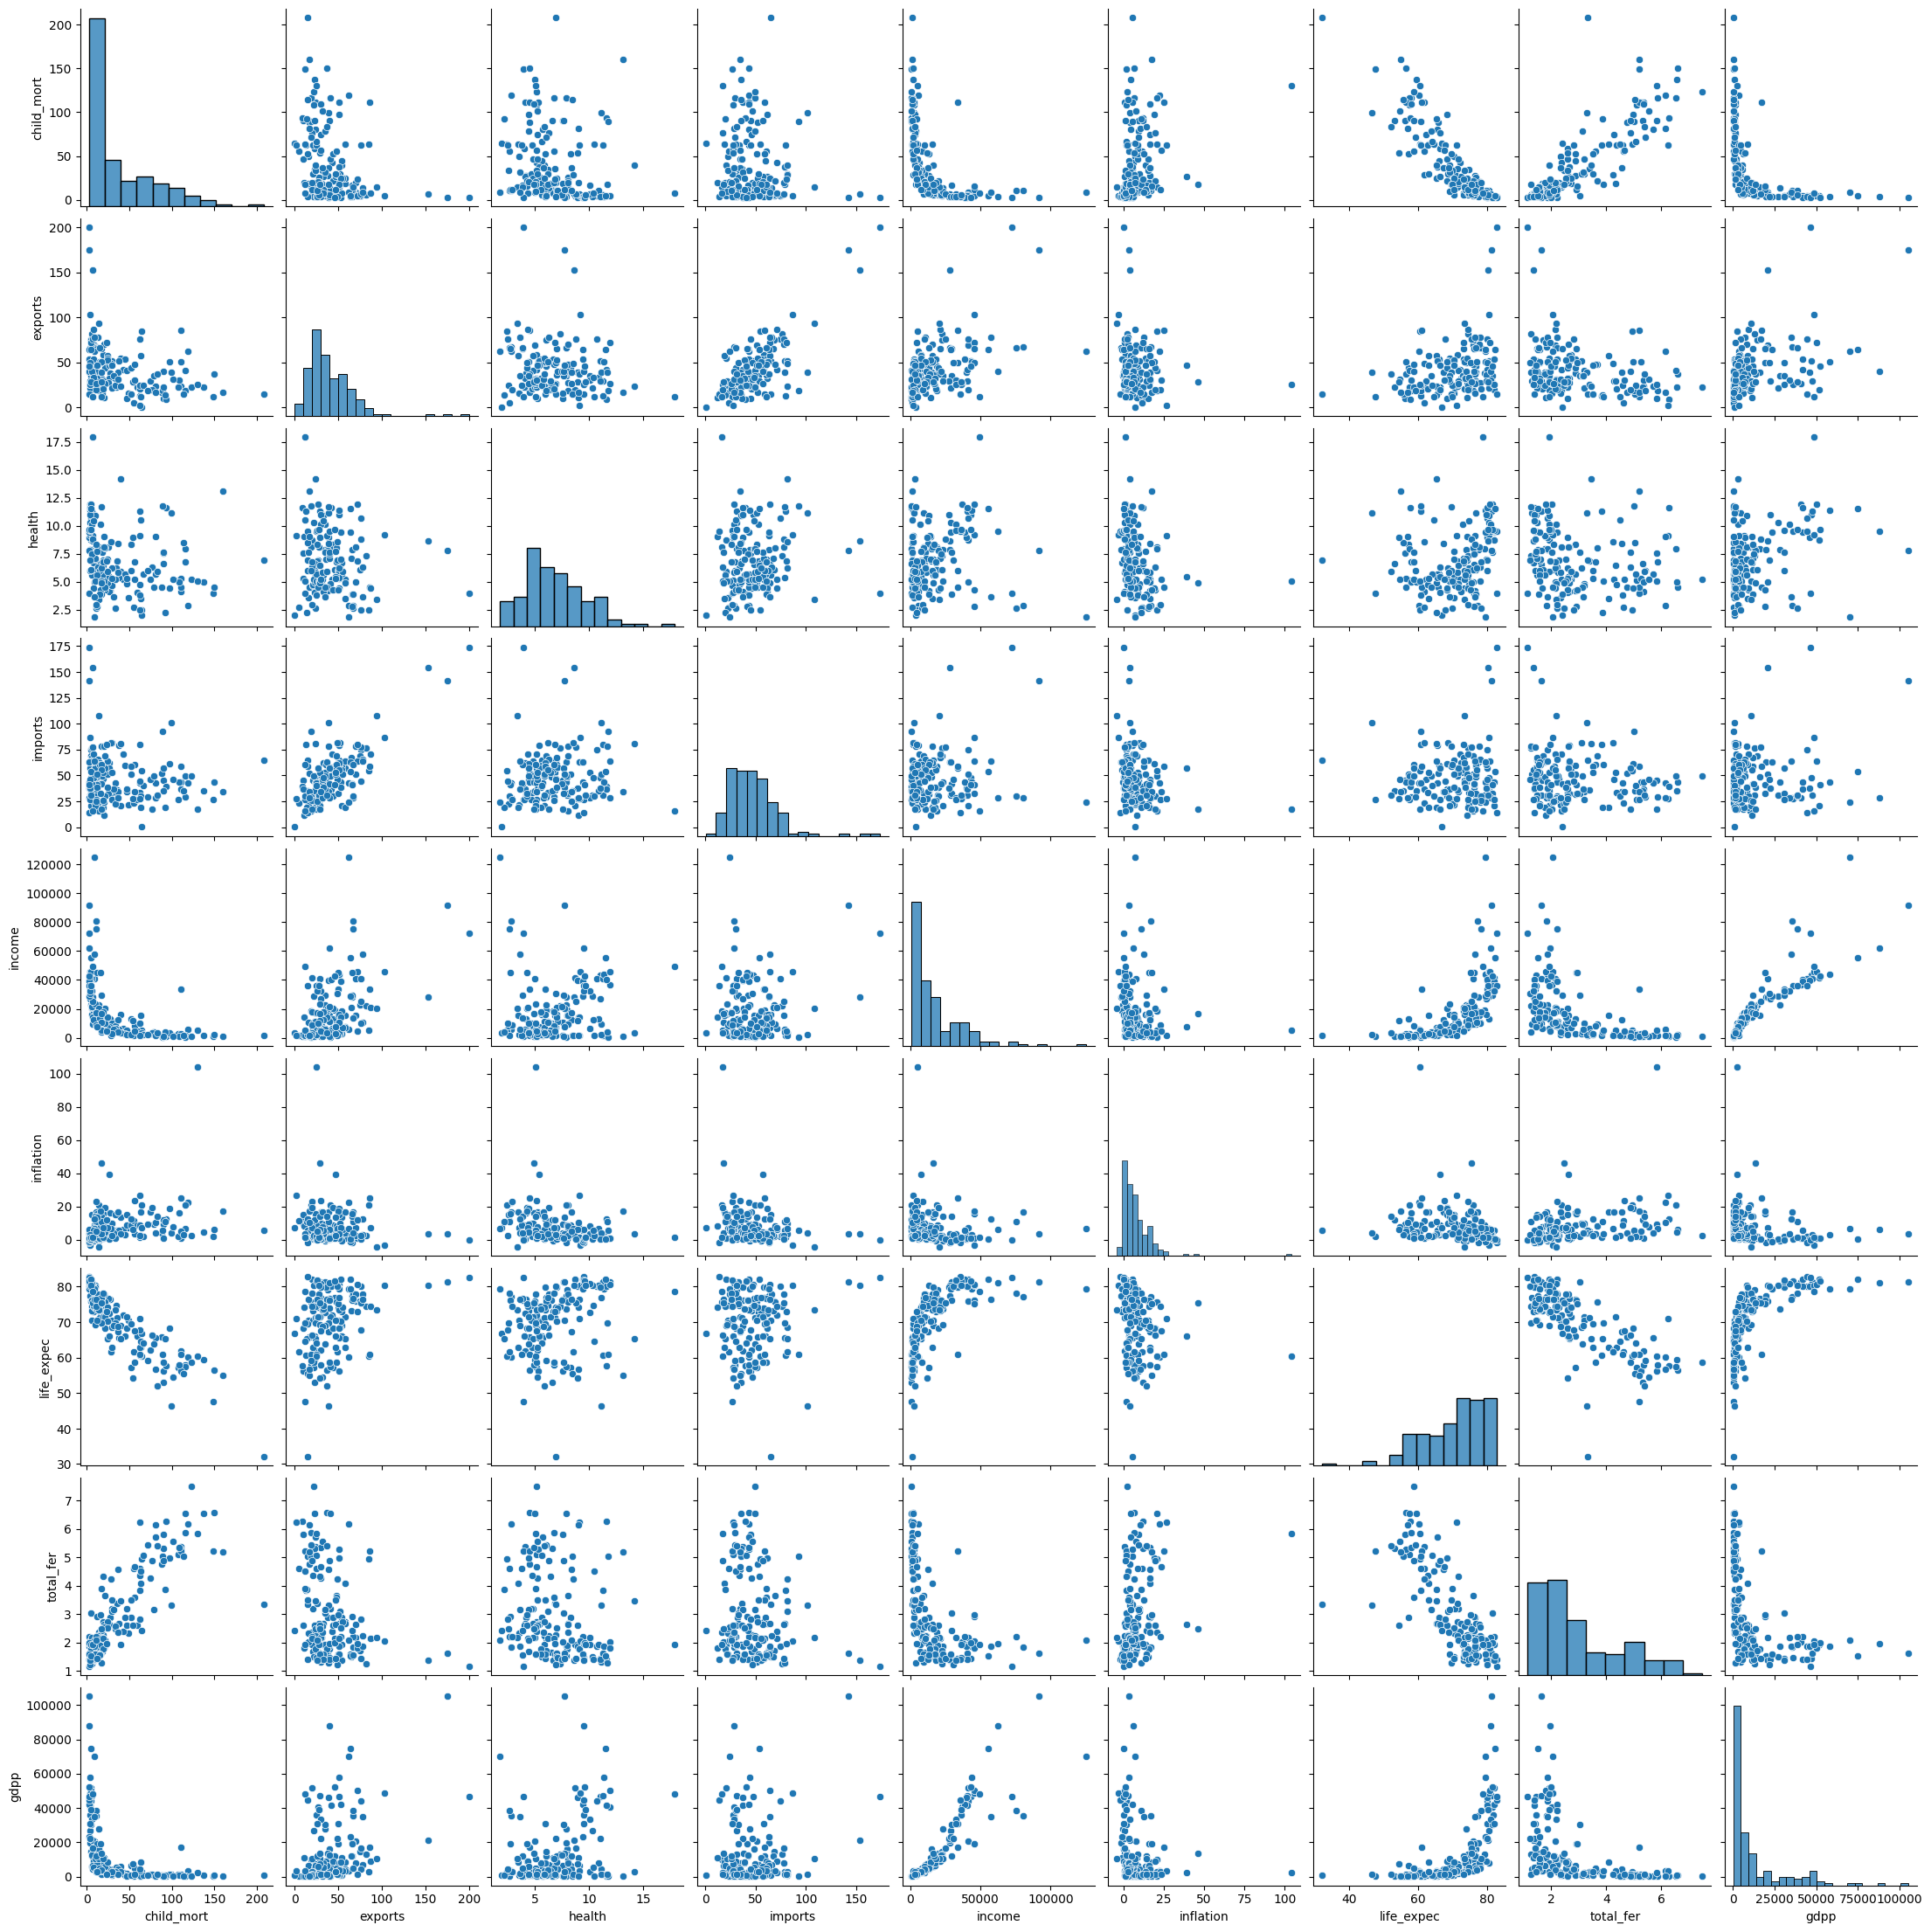

In [16]:
sns.pairplot(df)

In [17]:
for i in df:
  if (df[i].dtype != 'object'):
    print(i,"is a numeric column")
  else:
    print(i ,"is a categorical column")

country is a categorical column
child_mort is a numeric column
exports is a numeric column
health is a numeric column
imports is a numeric column
income is a numeric column
inflation is a numeric column
life_expec is a numeric column
total_fer is a numeric column
gdpp is a numeric column


<ipython-input-18-3049e214bfaf>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




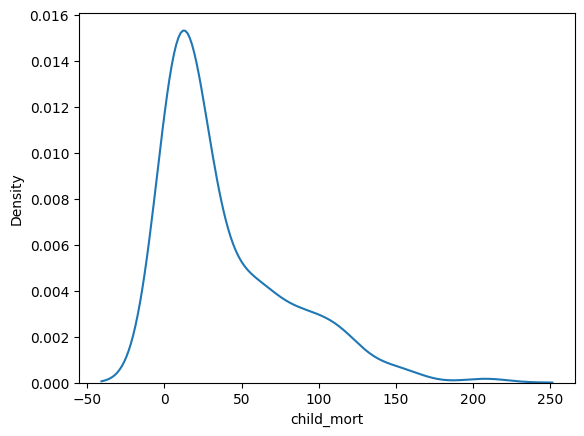

<ipython-input-18-3049e214bfaf>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




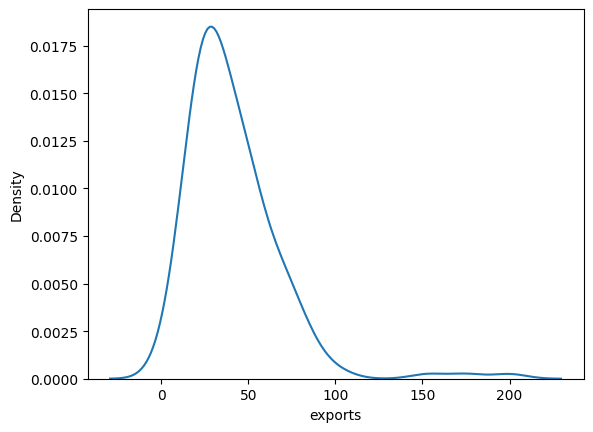

<ipython-input-18-3049e214bfaf>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




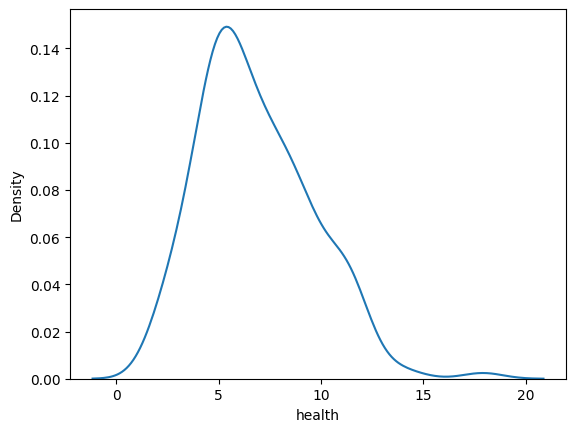

<ipython-input-18-3049e214bfaf>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




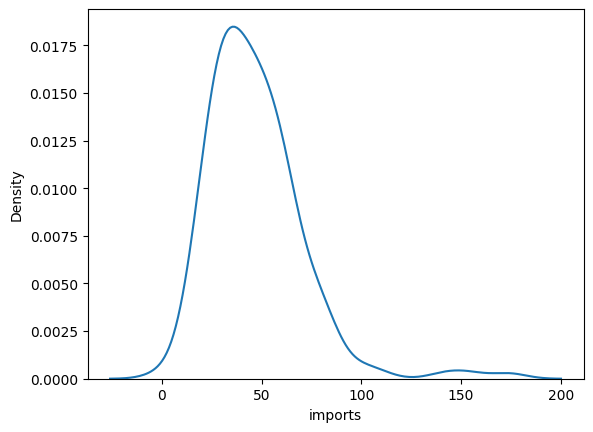

<ipython-input-18-3049e214bfaf>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




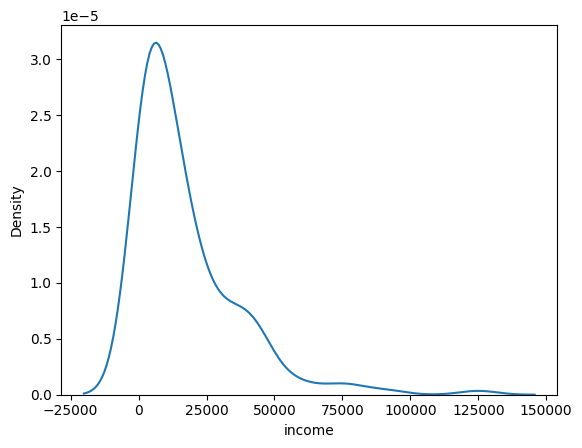

<ipython-input-18-3049e214bfaf>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




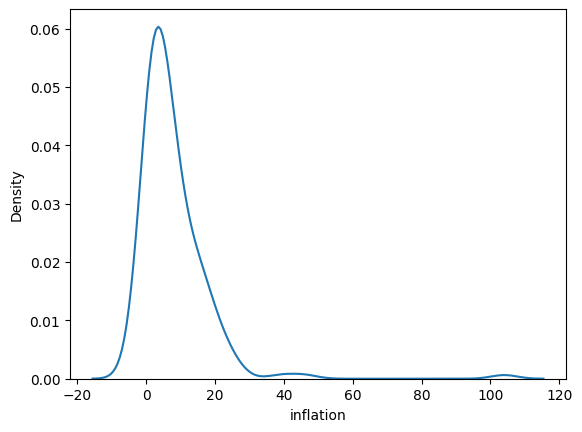

<ipython-input-18-3049e214bfaf>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




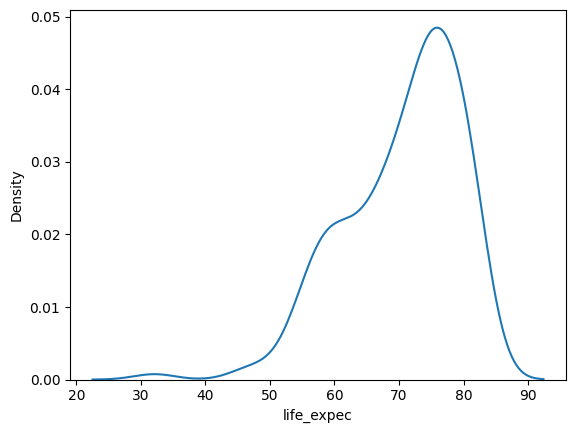

<ipython-input-18-3049e214bfaf>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




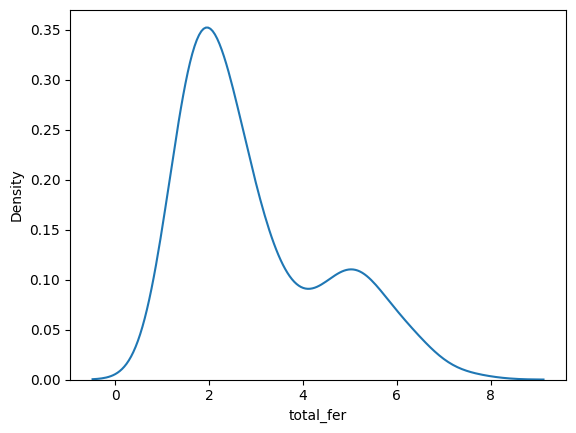

<ipython-input-18-3049e214bfaf>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




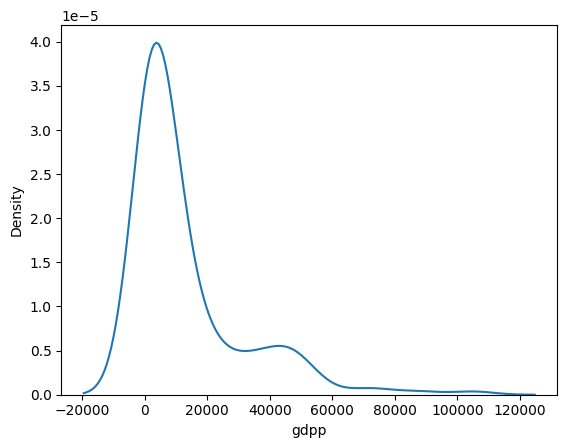

In [18]:
for i in df.columns[1:]:
  sns.distplot(df[i],hist=False, bins=10)
  plt.show()

In [19]:
k=0
for i in df.skew():
  if i < 0:
    print(df.columns[k]," is left skewed")
  if i > 0:
    print(df.columns[k]," is right skewed")
  k+=1

country  is right skewed
child_mort  is right skewed
exports  is right skewed
health  is right skewed
imports  is right skewed
income  is right skewed
inflation  is left skewed
life_expec  is right skewed
total_fer  is right skewed


<ipython-input-19-1644abdcb7e6>:2: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [20]:
from scipy import stats
for i in df.columns[1:]:
  z = np.abs(stats.zscore(df[i]))
  print(z)
  threshold = 2

  # Position of the outlier
  print(np.where(z > 2))

0      1.291532
1      0.538949
2      0.272833
3      2.007808
4      0.695634
         ...   
162    0.225578
163    0.526514
164    0.372315
165    0.448417
166    1.114951
Name: child_mort, Length: 167, dtype: float64
(array([  3,  31,  32,  66,  97, 112, 113, 132]),)
0      1.138280
1      0.479658
2      0.099122
3      0.775381
4      0.160668
         ...   
162    0.200917
163    0.461363
164    1.130305
165    0.406478
166    0.150348
Name: exports, Length: 167, dtype: float64
(array([ 73,  91,  98, 133]),)
0      0.279088
1      0.097016
2      0.966073
3      1.448071
4      0.286894
         ...   
162    0.571711
163    0.695862
164    0.008877
165    0.597272
166    0.338015
Name: health, Length: 167, dtype: float64
(array([101, 132, 159]),)
0      0.082455
1      0.070837
2      0.641762
3      0.165315
4      0.497568
         ...   
162    0.240700
163    1.213499
164    1.380030
165    0.517472
166    0.662477
Name: imports, Length: 167, dtype: float64
(array([ 87,  

<ipython-input-21-f0002af2b19e>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




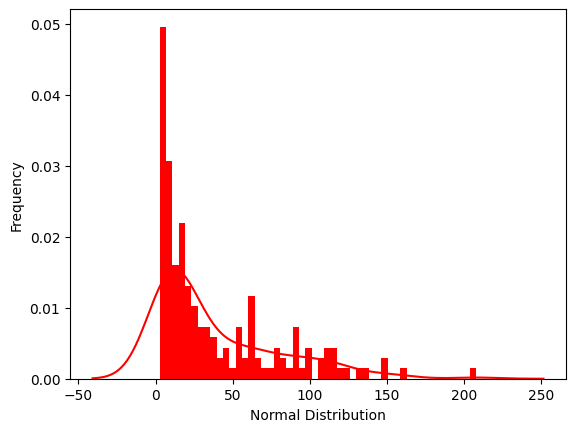

<ipython-input-21-f0002af2b19e>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




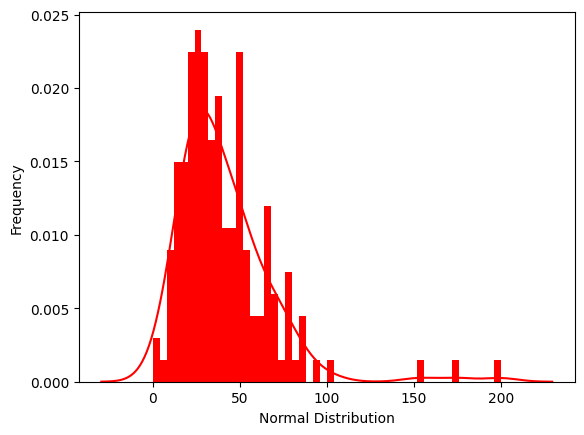

<ipython-input-21-f0002af2b19e>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




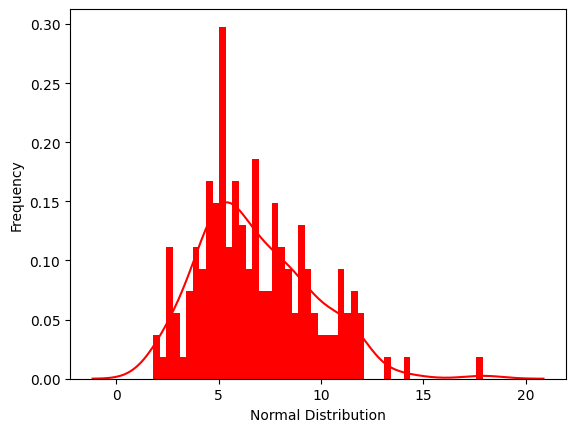

<ipython-input-21-f0002af2b19e>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




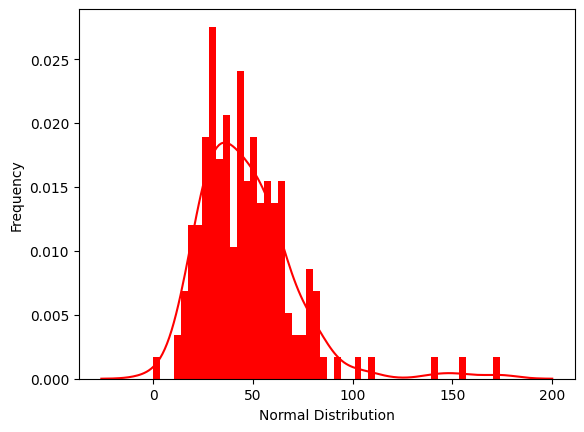

<ipython-input-21-f0002af2b19e>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




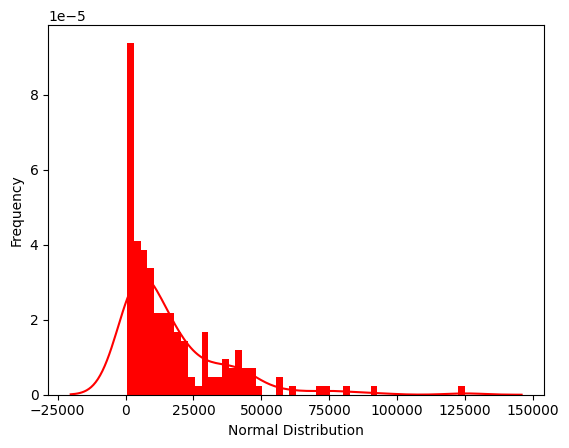

<ipython-input-21-f0002af2b19e>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




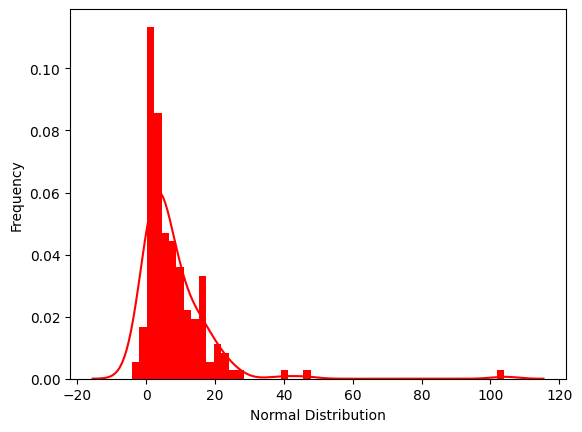

<ipython-input-21-f0002af2b19e>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




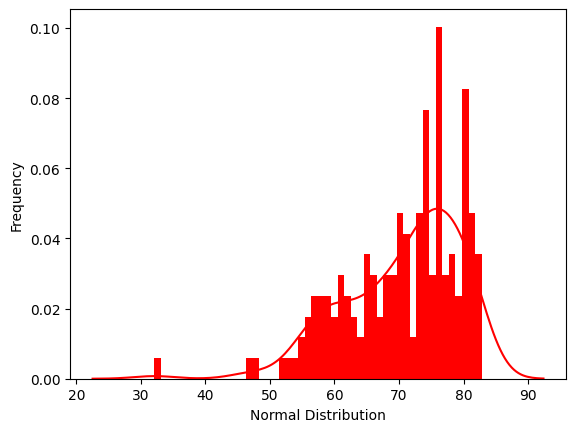

<ipython-input-21-f0002af2b19e>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




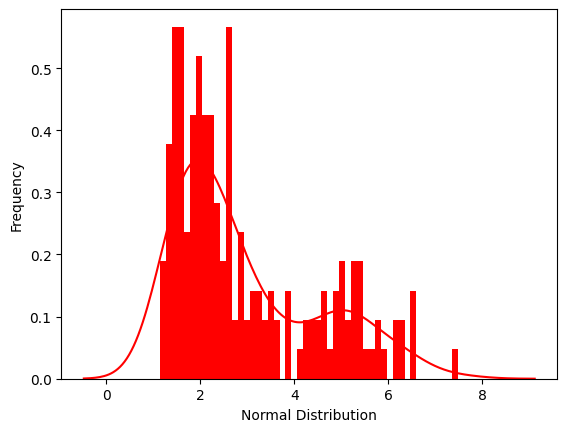

<ipython-input-21-f0002af2b19e>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




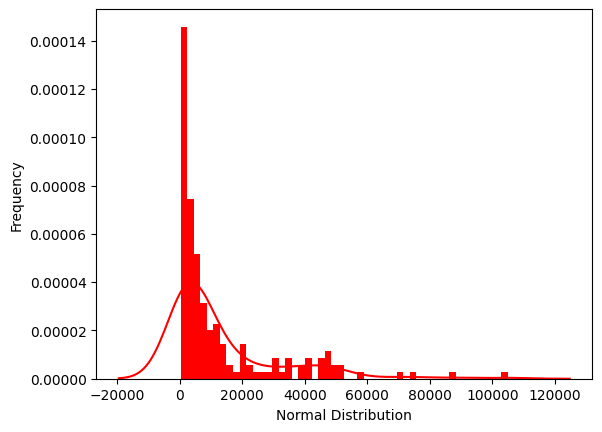

In [21]:
# plotting a histogram
for i in df.columns[1:]:
  ax = sns.distplot(df[i],
                    bins=50,
                    kde=True,
                    color='red',
                    hist_kws={"linewidth": 15,'alpha':1})
  ax.set(xlabel='Normal Distribution', ylabel='Frequency')

  plt.show()

In [22]:
colors = dict(zip(df.columns,['red','blue','green','orange','purple','black','brown','grey','pink']))

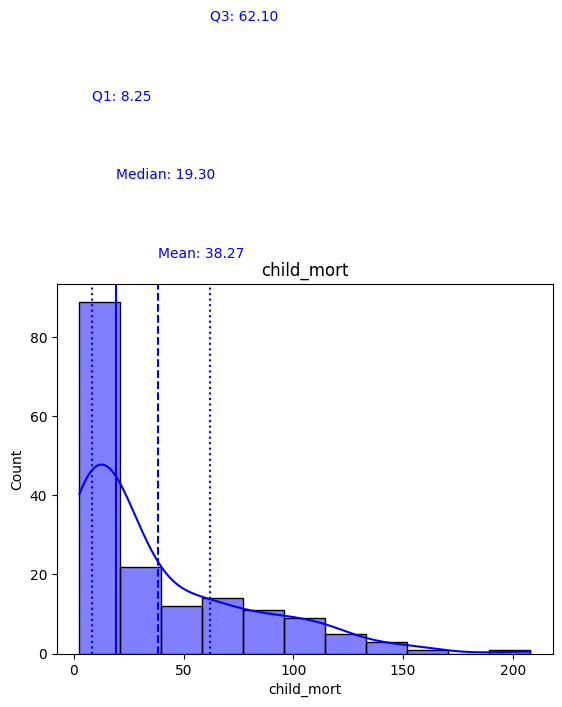

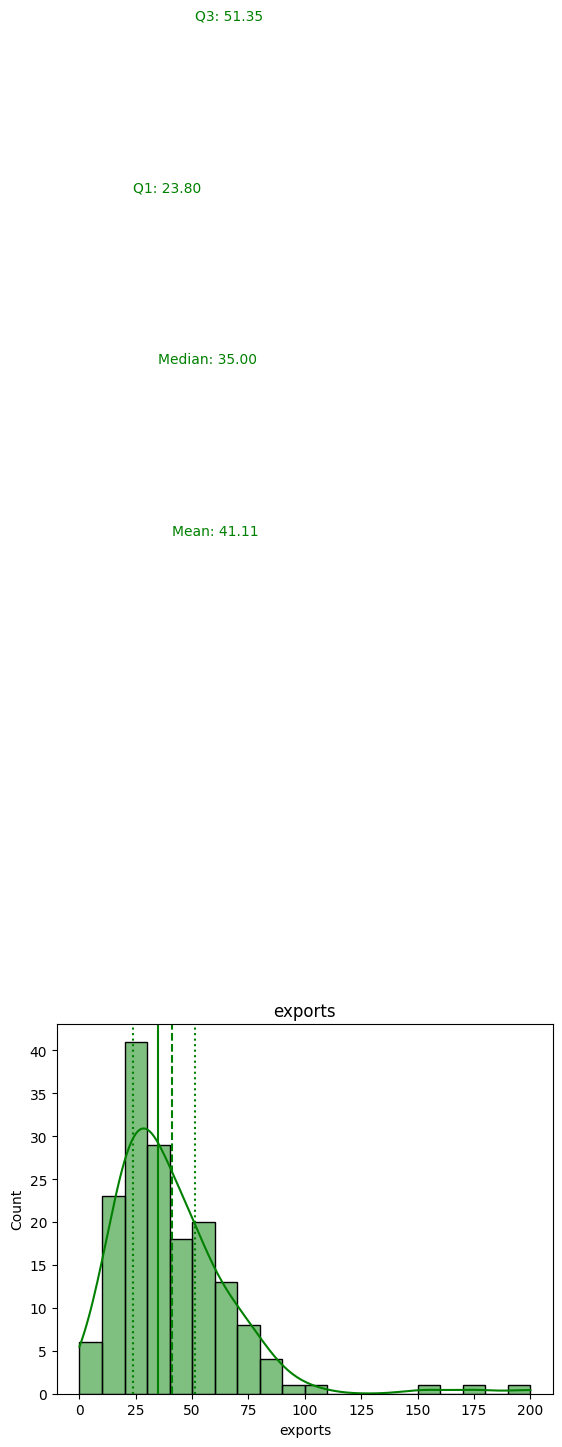

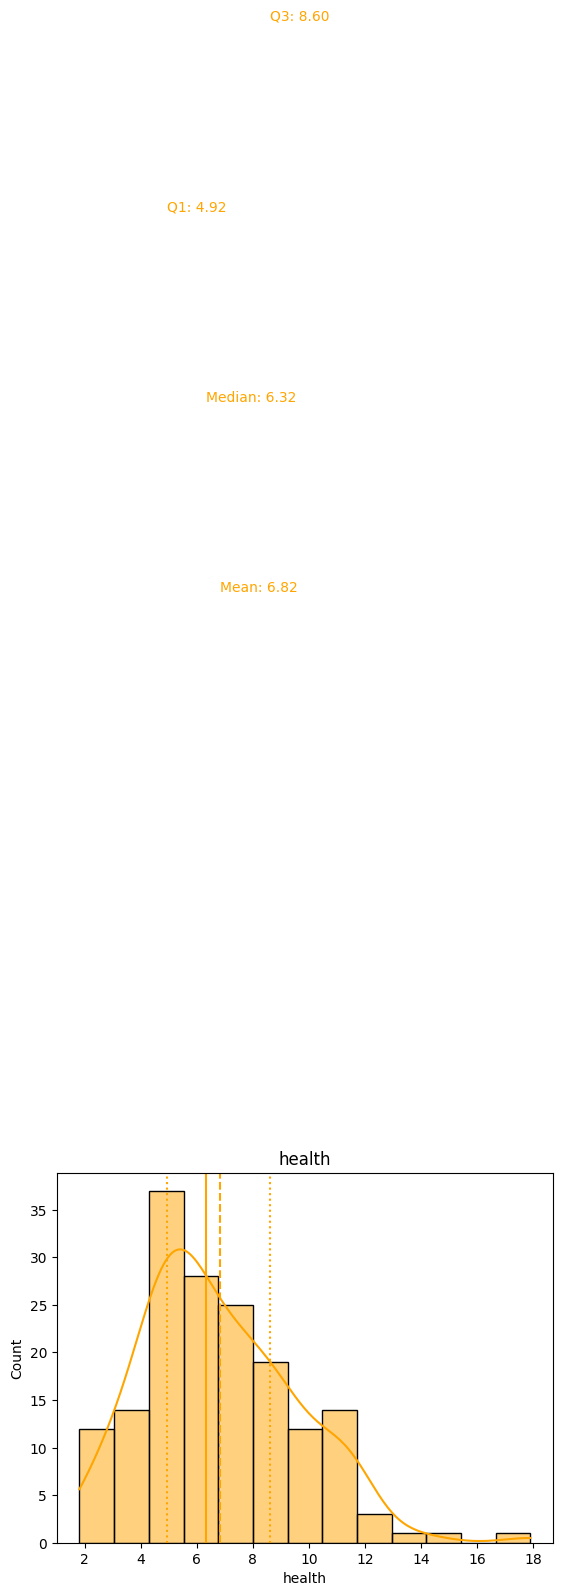

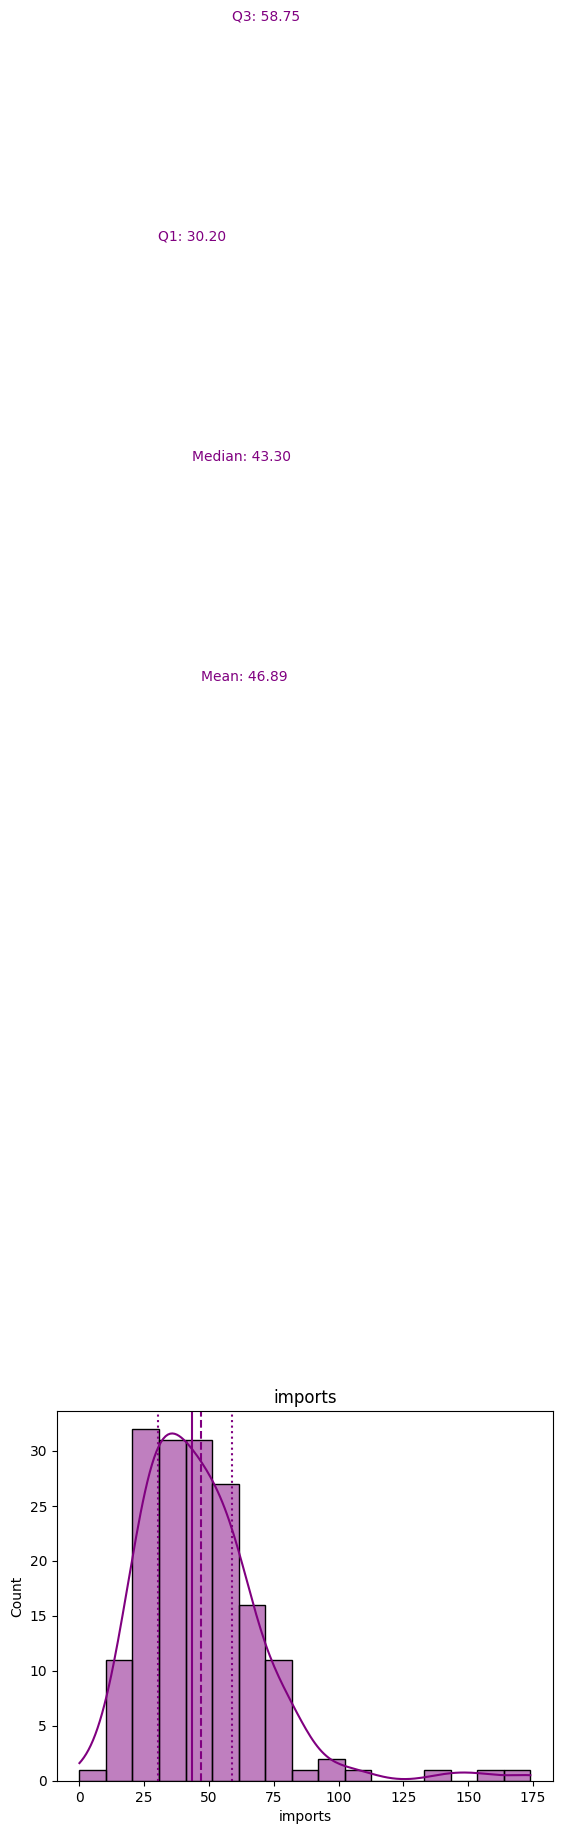

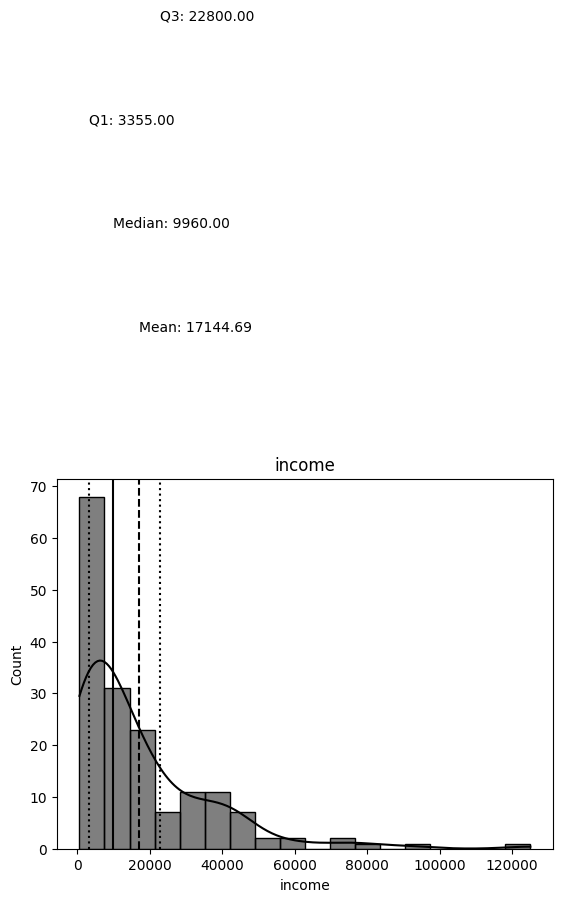

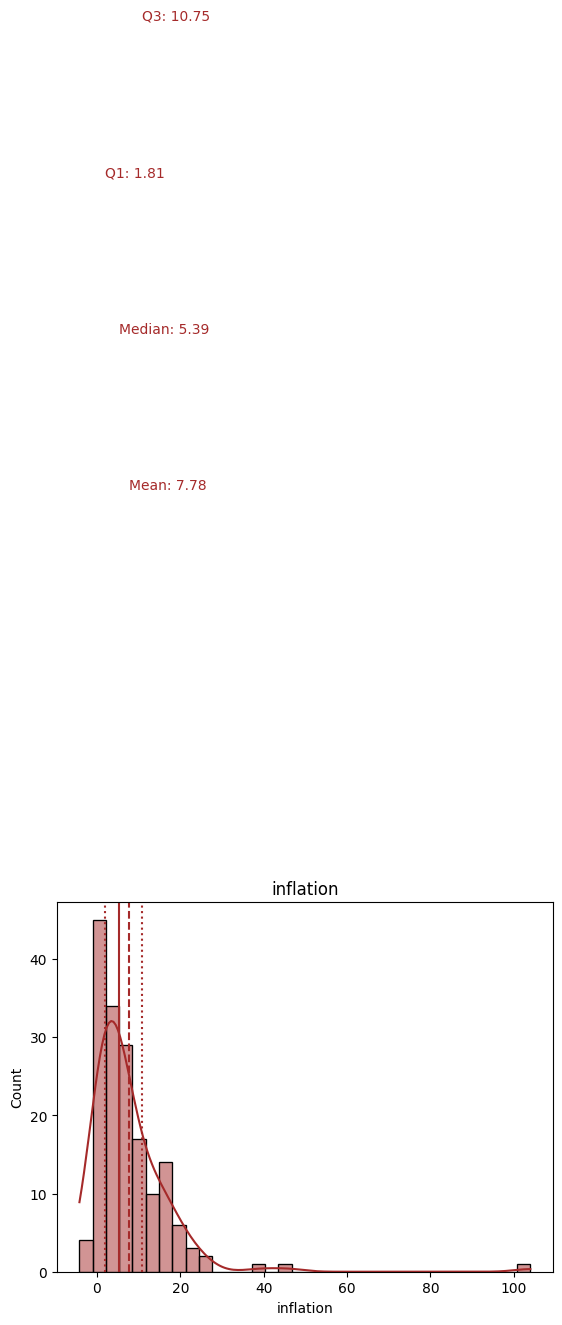

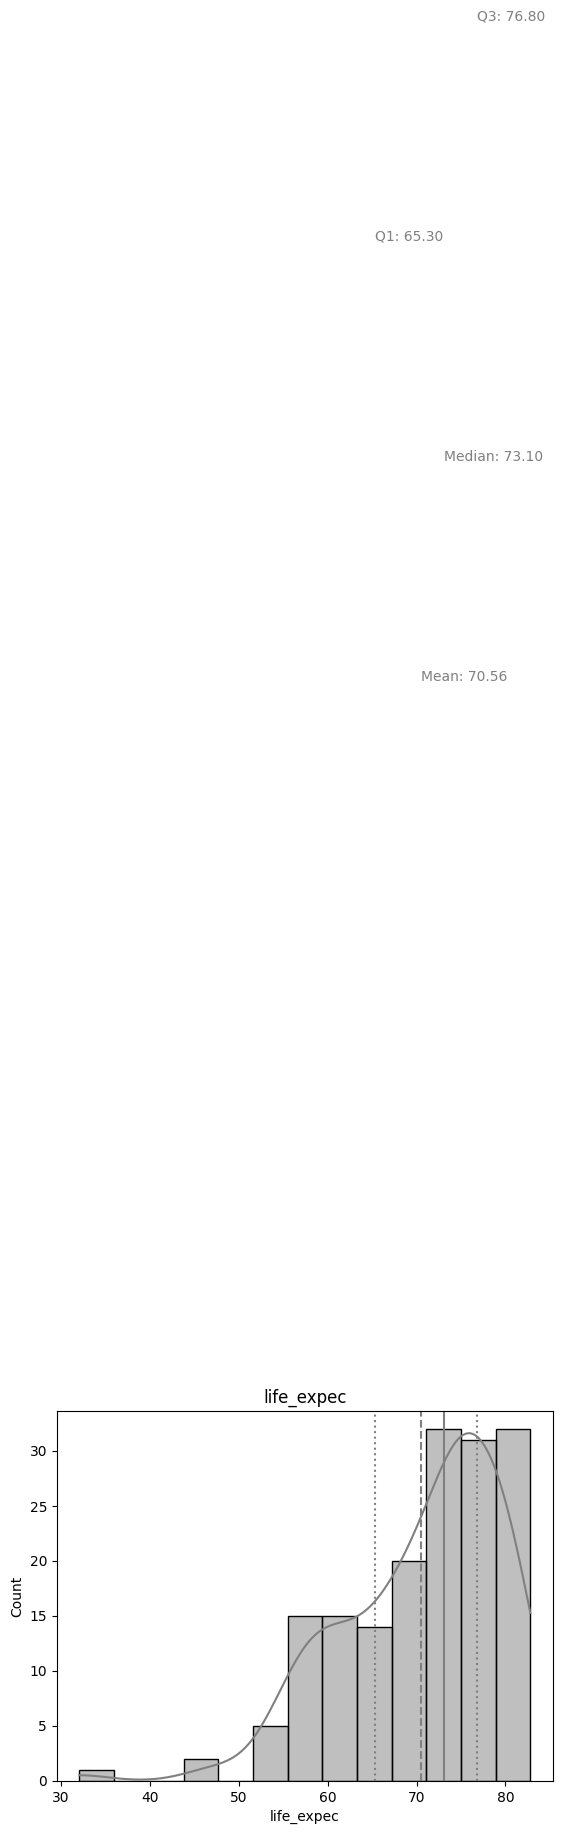

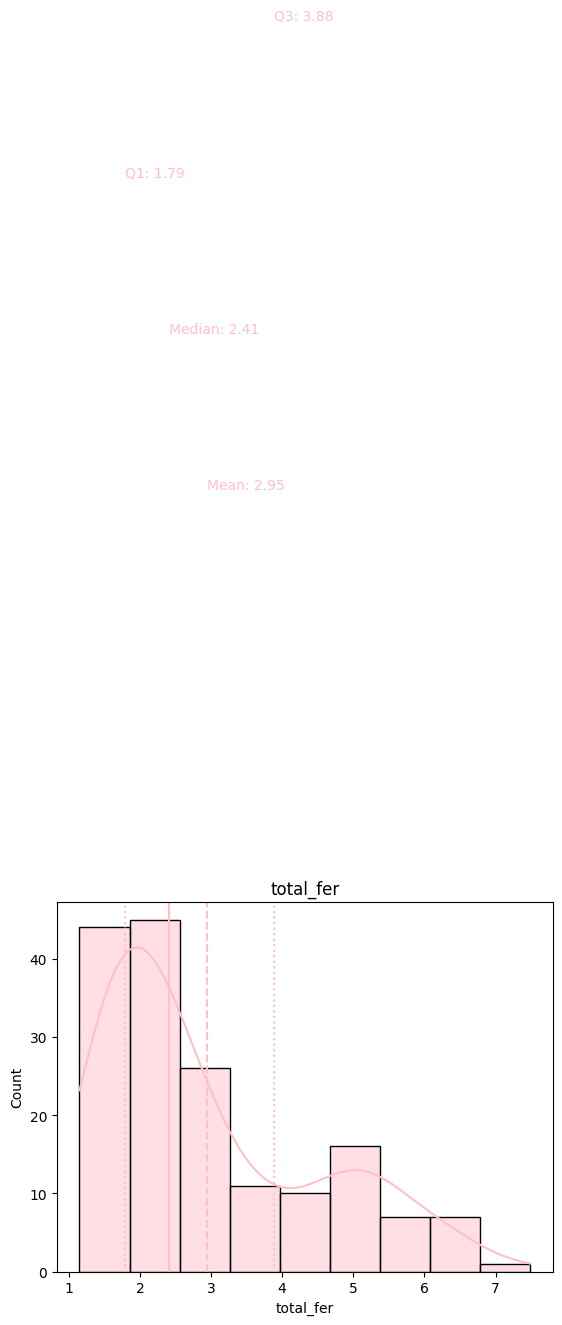

In [23]:
for i in df.columns[1:len(df.columns)-1]:
  sns.histplot(data=df,x=i,kde=True,color=colors[i])
  plt.axvline(df[i].mean(), color=colors [i], linestyle= 'dashed')
  plt.axvline(df [i].median(), color=colors [i])
  plt.axvline(df[i].quantile (0.25), color=colors [i], linestyle='dotted')
  plt.axvline (df[i].quantile (0.75), color=colors [i], linestyle='dotted')
  plt.text(df[i].mean(), 100, 'Mean: {:.2f}'.format(df [i].mean()), color=colors [i])
  plt.text(df[i].median(), 120, 'Median: {:.2f}'.format(df[i].median()), color=colors [i])
  plt.text(df[i].quantile (0.25), 140, 'Q1: {:.2f}'.format(df [i].quantile (0.25)), color=colors[i])
  plt.text(df[i].quantile (0.75), 160, 'Q3: {:.2f}'.format(df[i].quantile (0.75)), color=colors [i])
  plt.title(i)
  plt.show()

In [24]:
# Gain a better understanding of the features
top_countries = df.nlargest(10, 'child_mort')['country']
bottom_countries = df.nsmallest(10, 'child_mort')['country']
print("Top 10 countries with highest child mortality rate:")
print(top_countries)
print("Bottom 10 countries with lowest child mortality rate:")
print(bottom_countries)

Top 10 countries with highest child mortality rate:
66                        Haiti
132                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
113                     Nigeria
112                       Niger
3                        Angola
25                 Burkina Faso
37             Congo, Dem. Rep.
Name: country, dtype: object
Bottom 10 countries with lowest child mortality rate:
68            Iceland
91         Luxembourg
133         Singapore
53            Finland
144            Sweden
77              Japan
114            Norway
135          Slovenia
43     Czech Republic
42             Cyprus
Name: country, dtype: object


In [25]:
# Create a boolean mask for the top and bottom 10 countries
top_bottom_mask = df['country'].isin(top_countries) | df['country'].isin(bottom_countries)

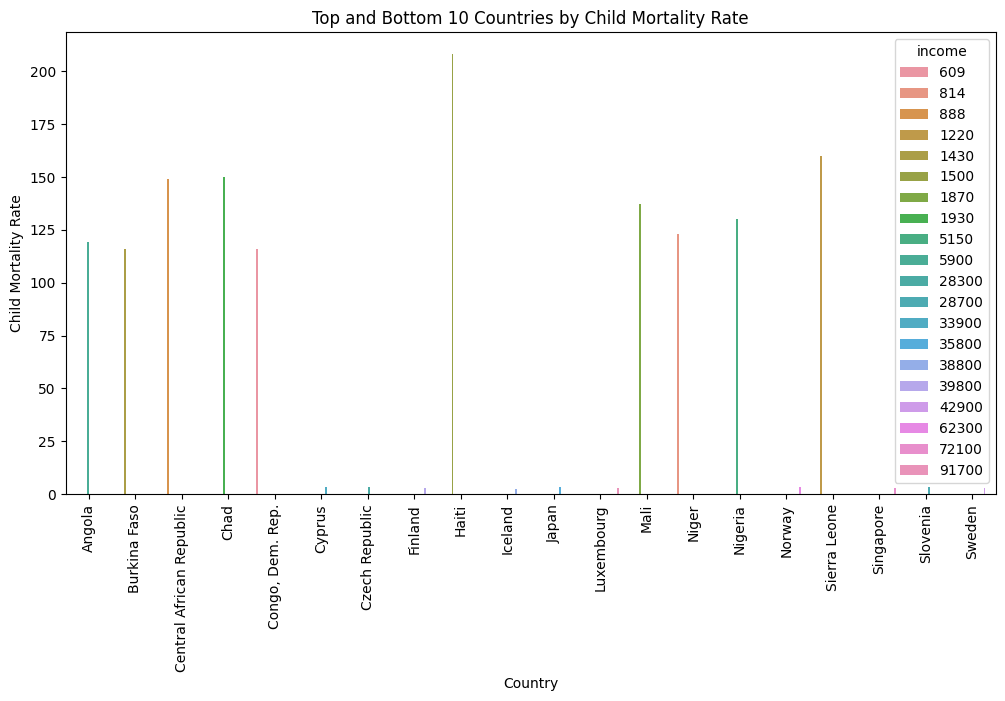

In [26]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df[top_bottom_mask], x='country', y='child_mort', hue='income')
plt.xlabel('Country')
plt.ylabel('Child Mortality Rate')
plt.title('Top and Bottom 10 Countries by Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create PCA object and fit the scaled data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[df.columns[1:len(df.columns)-1]])
pca = PCA()
pca.fit(scaled_data)

PCA()

In [28]:
  # Get the number of principal components
  n_components = pca.n_components_
  print("Number of Principal Components:", n_components)

Number of Principal Components: 8


In [29]:
# Print the explained variance of each principal component
explained_variance = pca.explained_variance_
print("Explained Variance of Each Principal Component:", explained_variance)

Explained Variance of Each Principal Component: [3.59615705 1.55324696 1.17038164 0.74324181 0.56558787 0.22483356
 0.10919005 0.08555385]


In [30]:
# Print the total variance explained by all the principal components
total_variance = np.sum(explained_variance)
print("Total Variance Explained:", total_variance)

Total Variance Explained: 8.048192771084334


In [33]:
# Print the explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio of Each Principal Component:", explained_variance_ratio)

Explained Variance Ratio of Each Principal Component: [0.4468279  0.19299326 0.14542167 0.09234891 0.07027514 0.02793591
 0.01356703 0.01063019]


In [34]:
# Calculate percentage variation
cumulative_variance = np.cumsum(explained_variance_ratio)
percentage_variation = cumulative_variance * 100

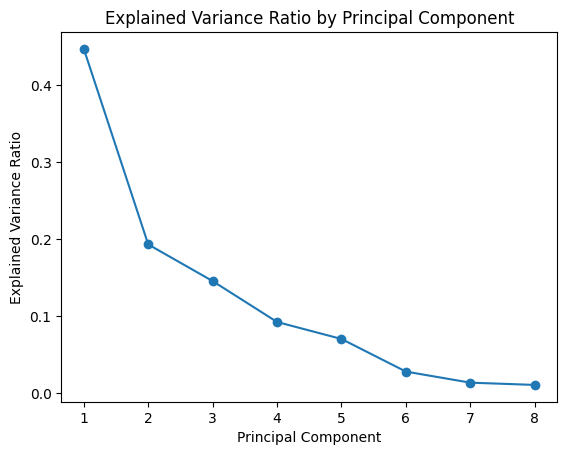

In [35]:
# Variance explained by each dimension plot
plt.plot(range(1, n_components + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(range(1, n_components + 1))
plt.show()

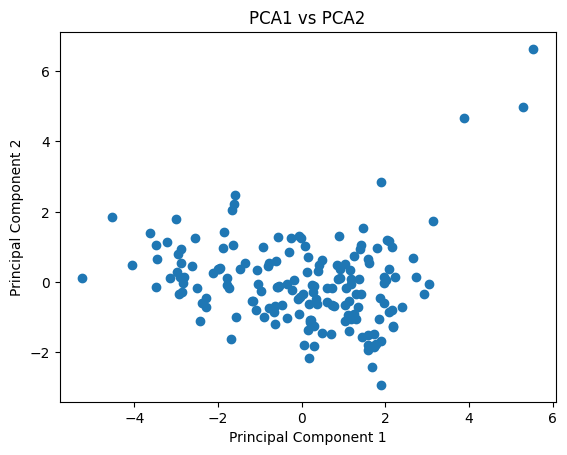

In [36]:
# PCA1 vs PCA2 plot
pca_components = pca.transform(scaled_data)
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA1 vs PCA2')
plt.show()

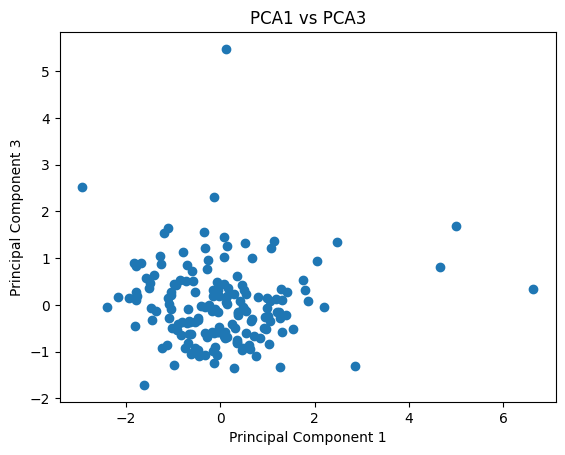

In [37]:
pca_components = pca.transform(scaled_data)
plt.scatter(pca_components[:, 1], pca_components[:, 3])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('PCA1 vs PCA3')
plt.show()

In [38]:
# Principal Component Data Decomposition
pca = PCA(n_components=5)
pca_components

array([[-2.90588356,  0.15831381, -0.90906789, ..., -0.25318852,
         0.45343967,  0.34030638],
       [ 0.72407239, -0.65618364, -0.11255397, ...,  0.07829256,
         0.21581491, -0.2883451 ],
       [-0.09680905, -0.47784487,  1.36055076, ..., -0.40338064,
        -0.10962844, -0.18679234],
       ...,
       [ 0.88487943,  1.31503703, -0.02880983, ...,  0.04327827,
        -0.21407441, -0.15567846],
       [-1.79158002, -0.07758317,  1.07828949, ..., -0.54411219,
         0.04414186,  0.11765855],
       [-2.87433084,  0.55562681,  0.04512834, ...,  0.2060007 ,
        -0.37567499,  0.82422459]])

In [39]:
pca.fit(scaled_data)

PCA(n_components=5)